In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [3]:
uber_data = pd.read_csv(r"C:\DATA_SCIENCE\EDA\ncr_ride_bookings.csv")

In [47]:
uber_data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
sample_data = uber_data.copy()

# performing necessary datatypes conversion

In [8]:
sample_data['Date'] = pd.to_datetime(sample_data['Date'] , errors = 'coerce')
sample_data['Time']= pd.to_datetime(sample_data['Time'] , format='%H:%M:%S' ,errors = 'coerce').dt.time
sample_data['Booking ID']= sample_data['Booking ID'].astype(str).str.replace('"','')
sample_data['Customer ID']= sample_data['Customer ID'].astype(str).str.replace('"','')
category_cols = [
    'Booking Status','Vehicle Type','Pickup Location', 'Drop Location',
    'Reason for cancelling by Customer' , 'Driver Cancellation Reason',
    'Incomplete Rides Reason','Payment Method'
]
for cols in category_cols:
    sample_data[cols]=sample_data[cols].astype('category')

Assigning binary(0/1) to cols : (['Incomplete rides'] ,[cancelled rides by driver],[cancelled rides by customer]) 
Assigning "Not Applicable" to cols : (['reason_for cancel_by_customer']['driver_cancellation_reason']['incomplete_ride_reason'])

In [11]:
sample_data['Incomplete Rides']= sample_data['Incomplete Rides'].fillna(0).astype(int)
sample_data['Cancelled Rides by Customer']= sample_data['Cancelled Rides by Customer'].fillna(0).astype(int)
sample_data['Cancelled Rides by Driver']= sample_data['Cancelled Rides by Driver'].fillna(0).astype(int)
categories_cols =[
    'Reason for cancelling by Customer',
    'Driver Cancellation Reason',
    'Incomplete Rides Reason'
]
for col in categories_cols:
    sample_data[col]=sample_data[col].cat.add_categories("Not Applicable")
    sample_data[col]=sample_data[col].fillna("Not Applicable")

###### Checking duplicate values

In [17]:
print(sample_data.duplicated().sum())

0


# Dealing with missing values

In [23]:
sample_data.isna().sum()

Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             10500
Avg CTAT                             48000
Cancelled Rides by Customer              0
Reason for cancelling by Customer        0
Cancelled Rides by Driver                0
Driver Cancellation Reason               0
Incomplete Rides                         0
Incomplete Rides Reason                  0
Booking Value                        48000
Ride Distance                        48000
Driver Ratings                       57000
Customer Rating                      57000
Payment Method                       48000
dtype: int64

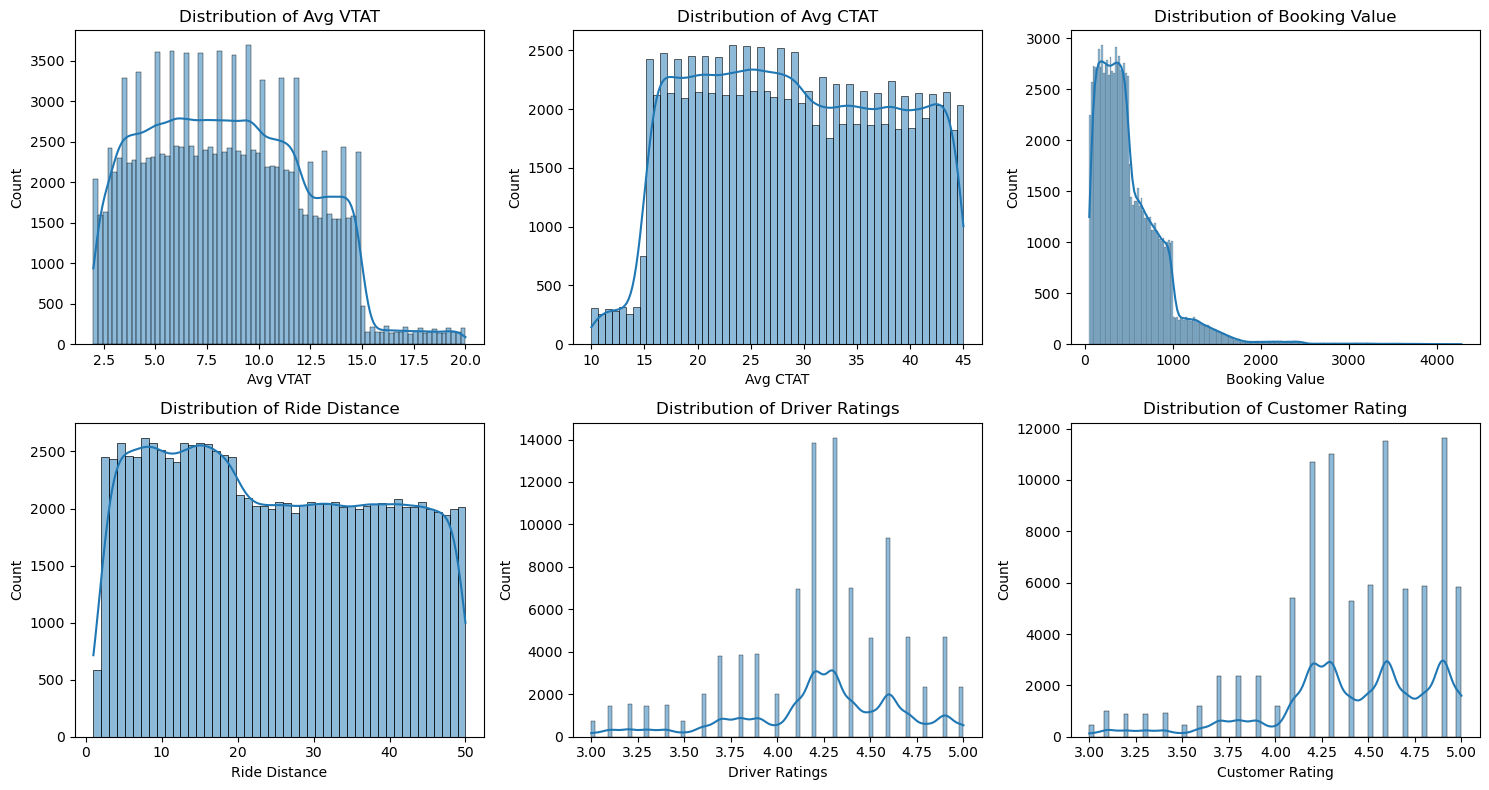

In [222]:
numeric_cols =['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']

fig , axes = plt.subplots(2,3 , figsize=(15,8))
for ax ,col in zip(axes.flatten() , numeric_cols):
    sns.histplot(uber_data[col] , ax =ax , kde=True)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [29]:
# FILLING MISSING VALUES WITH MEDIAN FOR NUMERIC DATA (AS DATA IS SLIGHTLY SKEWED)
cols_to_fill=['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
sample_data[cols_to_fill] = sample_data[cols_to_fill].fillna(sample_data[cols_to_fill].median())

In [49]:
# FILLING CATEGORICAL VALUES USING MODE
mode_value = sample_data['Payment Method'].mode()[0]
sample_data['Payment Method'] = sample_data['Payment Method'].fillna(mode_value)

In [51]:
sample_data.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2024-06-30 16:42:40.320000,8.445407,29.037753,0.070000,0.180000,0.060000,478.121220,24.343568,4.257215,4.440842
min,2024-01-01 00:00:00,2.000000,10.000000,0.000000,0.000000,0.000000,50.000000,1.000000,3.000000,3.000000
25%,2024-03-31 00:00:00,5.600000,25.000000,0.000000,0.000000,0.000000,319.750000,17.360000,4.200000,4.300000
50%,2024-07-01 00:00:00,8.300000,28.800000,0.000000,0.000000,0.000000,414.000000,23.720000,4.300000,4.500000
75%,2024-09-30 00:00:00,11.000000,32.900000,0.000000,0.000000,0.000000,521.000000,30.650000,4.300000,4.600000
max,2024-12-30 00:00:00,20.000000,45.000000,1.000000,1.000000,1.000000,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.639311,7.343053,0.255148,0.384189,0.237488,329.339976,11.554362,0.345619,0.347835


# Checking correlations between columns using heatmap

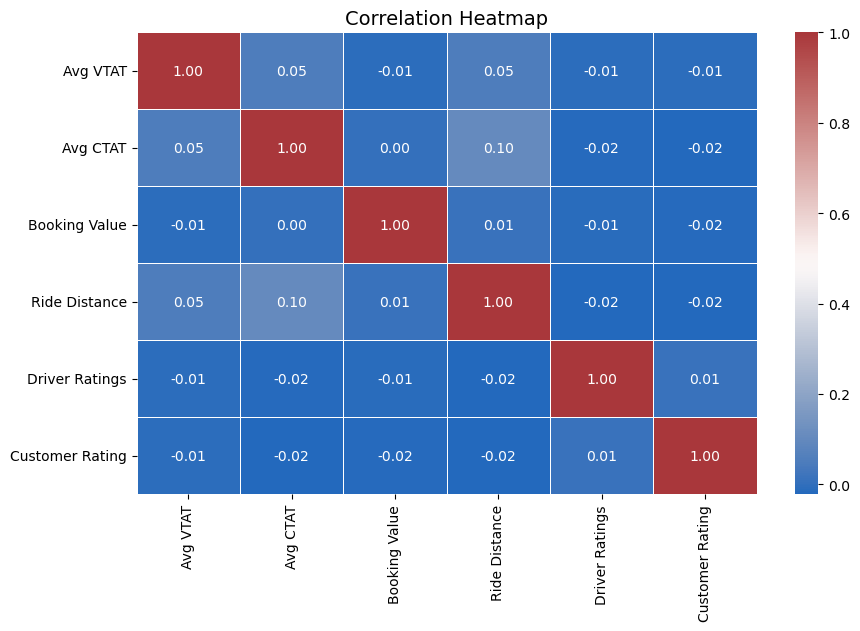

In [65]:
plt.figure(figsize =(10,6))
sns.heatmap(
    sample_data[numeric_cols].corr(),
    annot=True , fmt=".2f",cmap="vlag",linewidths=0.5
)
plt.title("Correlation Heatmap" , fontsize=14)
plt.show()

# Overall Booking Performance Metrics

In [73]:
# creating new dataframe for successfull_bookings http://localhost:8805/notebooks/uber_data_02.ipynb#Overall-Booking-Performance-Metrics
successful_bookings=sample_data[
(sample_data['Cancelled Rides by Customer']==0)&
(sample_data['Cancelled Rides by Driver']==0)&
(sample_data['Incomplete Rides']==0)
]

# sucessful vs failed comparsion
total_rides = len(sample_data)
successful_bookings_numbers = len(successful_bookings)
successful_bookings_rate= successful_bookings_numbers/total_rides*100
failed_bookings_number = total_rides - successful_bookings_numbers
failed_bookings_rate = failed_bookings_number/total_rides*100

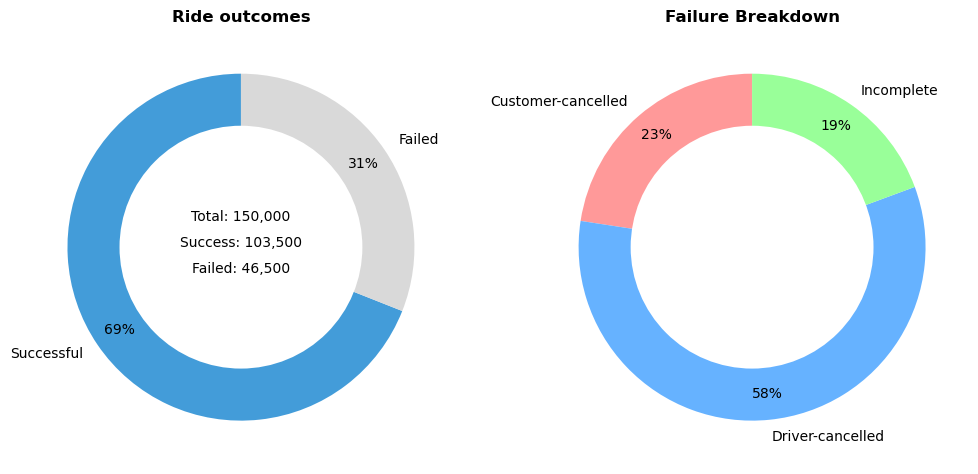

In [369]:
import matplotlib.pyplot as plt

# Data
sizes = [successful_bookings_numbers, failed_bookings_number]
percentage=list(by_reason.values())
labels = ['Successful', 'Failed']

#failed breakdown
labels1=list(by_reason.keys())
colors = ['#439CD9', '#d9d9d9'] # dark grey + light grey
colors1 = ['#FF9999', '#66B2FF', '#99FF99']

#subplots
fig, ax = plt.subplots(1,2 ,figsize=(10,6))
# Donut 1 success vs failed
wedges, texts, autotexts = ax[0].pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.0f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize':10, 'color':'black'}
)

# Donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax[0].add_artist(centre_circle)

# Center annotation (Total, Success, Failed)
ax[0].text(0, 0.15, f"Total: {total_rides:,}", ha='center', fontsize=10, color='black')
ax[0].text(0, 0.00, f"Success: {successful_bookings_numbers:,}", ha='center', fontsize=10, color='black')
ax[0].text(0, -0.15, f"Failed: {failed_bookings_number:,}", ha='center', fontsize=10, color='black')

# Title
ax[0].set_title("Ride outcomes" , fontsize=12 , weight = 'bold')

#donut 2 failed breakdown
wedges2, texts2, autotexts2 = ax[1].pie(
    percentage,
    labels=labels1,
    colors=colors1,
    autopct='%1.0f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize':10, 'color':'black'}
)
centre_circle2 = plt.Circle((0,0),0.70,fc='white')
ax[1].add_artist(centre_circle2)

ax[1].set_title("Failure Breakdown", fontsize=12, weight='bold')

# Layout
plt.tight_layout()
plt.show()



In [77]:
# failed rides distribution
by_reason = {
    "Customer-cancelled": sample_data['Cancelled Rides by Customer'].sum() / failed_bookings_number * 100,
    "Driver-cancelled":   sample_data['Cancelled Rides by Driver'].sum() / failed_bookings_number * 100,
    "Incomplete":         sample_data['Incomplete Rides'].sum() / failed_bookings_number * 100
}

# Print the percentages
for reason, value in by_reason.items():
    print(f"{reason}: {value:.2f}%")


Customer-cancelled: 22.58%
Driver-cancelled: 58.06%
Incomplete: 19.35%


In [83]:
# failure Reason Breakdown
customer_reasons = sample_data.groupby('Reason for cancelling by Customer', observed=True).size().reset_index(name='Count')
driver_reasons = sample_data.groupby('Driver Cancellation Reason',observed=True).size().reset_index(name='Count')
Incomplete_ride_reasons = sample_data.groupby('Incomplete Rides Reason',observed=True).size().reset_index(name='Count')

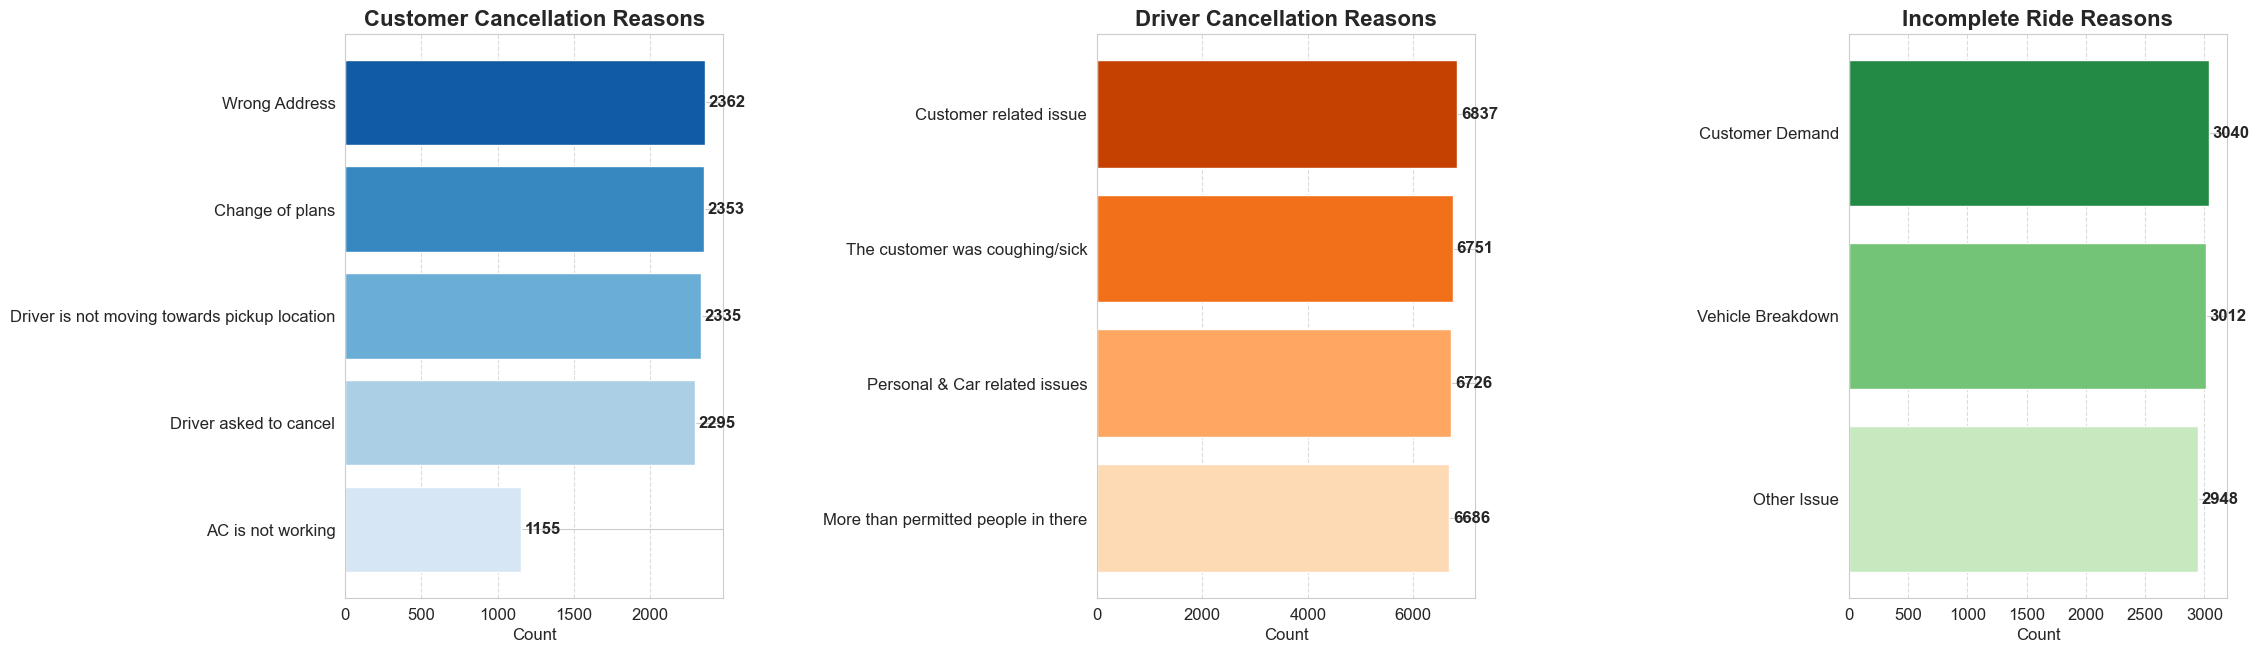

In [377]:
#bar chart for these three reasons

# Filter out "Not Applicable" from each dataframe
customer_reasons_filtered = customer_reasons[customer_reasons['Reason for cancelling by Customer'] != 'Not Applicable']
driver_reasons_filtered = driver_reasons[driver_reasons['Driver Cancellation Reason'] != 'Not Applicable']
Incomplete_ride_reasons_filtered = Incomplete_ride_reasons[Incomplete_ride_reasons['Incomplete Rides Reason'] != 'Not Applicable']


# Set style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Create figure with 3 horizontal subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)

def plot_bar(ax, data, y_col, title, color):
    data_sorted = data.sort_values('Count', ascending=True)
    bars = ax.barh(data_sorted[y_col], data_sorted['Count'], color=sns.color_palette(color, n_colors=len(data_sorted)))
    
    # Annotate bars with counts
    for bar in bars:
        width = bar.get_width()
        ax.text(width + max(data_sorted['Count'])*0.01, bar.get_y() + bar.get_height()/2,
                f'{int(width)}', va='center', fontweight='bold')
    
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Count')
    ax.set_ylabel('')
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Plot each category
plot_bar(axes[0], customer_reasons_filtered, 'Reason for cancelling by Customer', 'Customer Cancellation Reasons', 'Blues')
plot_bar(axes[1], driver_reasons_filtered, 'Driver Cancellation Reason', 'Driver Cancellation Reasons', 'Oranges')
plot_bar(axes[2], Incomplete_ride_reasons_filtered, 'Incomplete Rides Reason', 'Incomplete Ride Reasons', 'Greens')

plt.tight_layout(pad=5)
plt.show()




# Performance Metrics By Vehicle Type

In [94]:
#finding which vehicle is most booked 
booked_vehicles_count =sample_data.groupby('Vehicle Type' , observed=True).size().reset_index(name='Count')

C:\Users\aashu\AppData\Local\Temp\ipykernel_192532\1765532908.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\aashu\AppData\Local\Temp\ipykernel_192532\1765532908.py:8: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


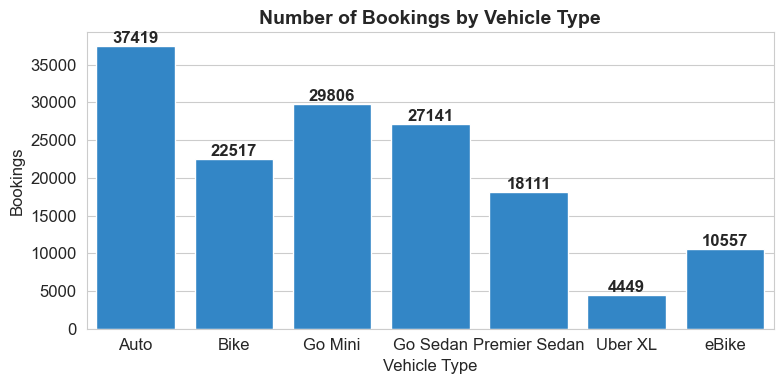

In [399]:


# Set style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 4))



sns.barplot(
    x='Vehicle Type', 
    y='Count', 
    data=booked_vehicles_count.sort_values('Count', ascending=False),
    palette=['#1B89DE']
)
plt.title('Number of Bookings by Vehicle Type', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Bookings', fontsize=12)
for index, row in booked_vehicles_count.iterrows():
    plt.text(row.name, row['Count'] + 2, row['Count'], ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [134]:
# finding out which vehicle has the most breakdown (one of the reason for incomplete rides)
vehicle_breakdown_rides = sample_data[
(sample_data['Incomplete Rides'] == 1) &
    (sample_data['Incomplete Rides Reason'] == 'Vehicle Breakdown')
]
vehicle_breakdown_count = vehicle_breakdown_rides.groupby('Vehicle Type' , observed=True).size().reset_index(name='Count')

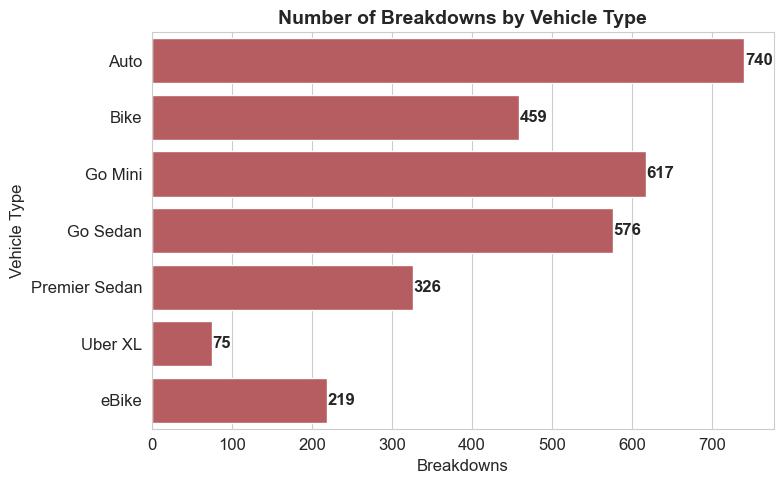

In [405]:
plt.figure(figsize=(8,5))
sns.barplot(
    y='Vehicle Type', 
    x='Count', 
    data=vehicle_breakdown_count, 
    color='#C44E52'
)

plt.title('Number of Breakdowns by Vehicle Type', fontsize=14, fontweight='bold')
plt.xlabel('Breakdowns', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)

# Annotate counts at end of bars
for i, row in vehicle_breakdown_count.iterrows():
    plt.text(row['Count'] + 0.5, i, int(row['Count']), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [136]:
# How often drivers cancel rides per vehicle type.
cancel_rate = sample_data.groupby('Vehicle Type', observed=True)['Cancelled Rides by Driver'].mean()*100

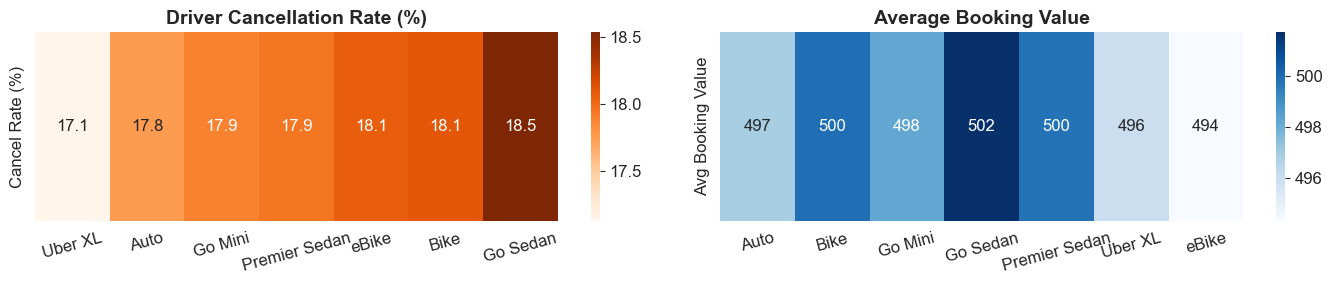

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(14, 3))  # adjust figsize as needed

# Heatmap 1: Driver Cancellation Rate
sns.heatmap(
    cancel_df.set_index('Vehicle Type').T,
    annot=True, fmt=".1f",
    cmap='Oranges',
    cbar=True,
    ax=axes[0]
)
axes[0].set_title('Driver Cancellation Rate (%)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_yticks(axes[0].get_yticks())
axes[0].tick_params(axis='x', rotation=15)

# Heatmap 2: Average Booking Value
sns.heatmap(
    avg_booking_value.set_index('Vehicle Type').T,
    annot=True, fmt=".0f",
    cmap='Blues',
    cbar=True,
    ax=axes[1]
)
axes[1].set_title('Average Booking Value', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_yticks(axes[1].get_yticks())
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()




In [138]:
# Number of incomplete rides per vehicle type
vehicle_incomplete = sample_data.groupby('Vehicle Type' , observed=True)['Incomplete Rides'].sum().reset_index(name='count')

In [154]:
# average booking value per vehicle type
avg_booking_value = successful_bookings.groupby('Vehicle Type' , observed=True)['Booking Value'].mean().reset_index(name='Avg Booking Value')

# Financial Analysis : Revenue Earned vs Potential Revenue and Loss Estimation”

In [171]:
# Actual revenue Earned
# only rides that happened successfully
revenue_earned = successful_bookings['Booking Value'].sum()

In [183]:
# revenue generated by each vehicle type
renvenue_vehicle_type = successful_bookings.groupby('Vehicle Type' ,observed =True)['Booking Value'].sum().reset_index(name='count')

C:\Users\aashu\AppData\Local\Temp\ipykernel_192532\2530615888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


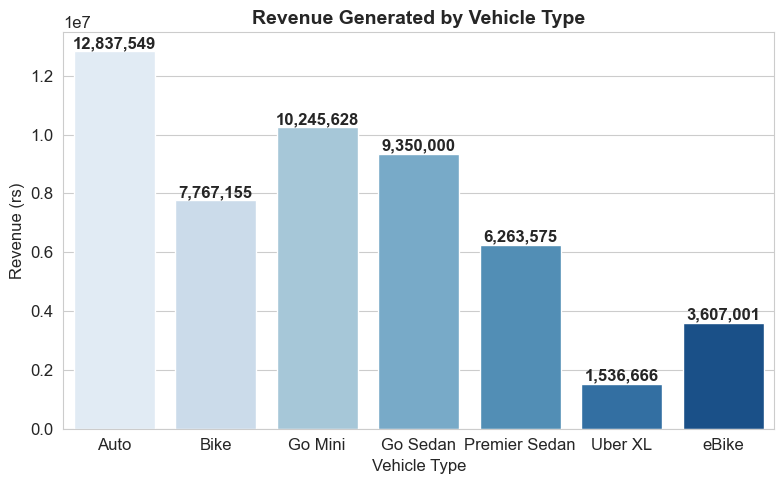

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    x='Vehicle Type', 
    y='count', 
    data=renvenue_vehicle_type.sort_values('count', ascending=False),
    palette='Blues'
)

plt.title('Revenue Generated by Vehicle Type', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Revenue (rs)', fontsize=12)

# Annotate values
for index, row in renvenue_vehicle_type.iterrows():
    plt.text(row.name, row['count'] + 200, f"{row['count']:,.0f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [175]:
# potential revenue 
# this includes revenue_earned + revenue_lost_by_drive_cancellation + revenue_lost_by_incomplete_rides
# we are not including revenue_lost_by_customer as company has no contral on it
potential_revenue = sample_data[
(sample_data['Cancelled Rides by Customer']==0)
]['Booking Value'].sum()

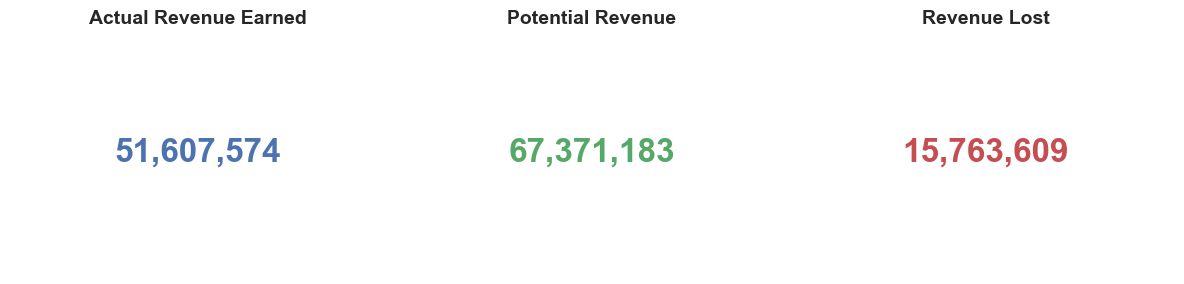

In [439]:

# Create figure with 3 cards side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Card 1: Actual Revenue Earned
axes[0].text(0.5, 0.5, f"{revenue_earned:,.0f}", fontsize=24, fontweight='bold', ha='center', va='center', color='#4C72B0')
axes[0].set_title('Actual Revenue Earned', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Card 2: Potential Revenue
axes[1].text(0.5, 0.5, f"{potential_revenue:,.0f}", fontsize=24, fontweight='bold', ha='center', va='center', color='#55A868')
axes[1].set_title('Potential Revenue', fontsize=14, fontweight='bold')
axes[1].axis('off')

# Card 3: Revenue Lost
axes[2].text(0.5, 0.5, f"{revenue_lost:,.0f}", fontsize=24, fontweight='bold', ha='center', va='center', color='#C44E52')
axes[2].set_title('Revenue Lost', fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [179]:
# revenue lost estimator
revenue_lost = potential_revenue - revenue_earned

In [213]:
# refenue lost categorization (driver cancellation , incomplete rides)
revenue_lost_driver_cancellation = sample_data[
(sample_data['Cancelled Rides by Driver']==1)
]['Booking Value'].sum()
revenue_lost_incomplete_rides = sample_data[
(sample_data['Incomplete Rides']==1)
]['Booking Value'].sum()

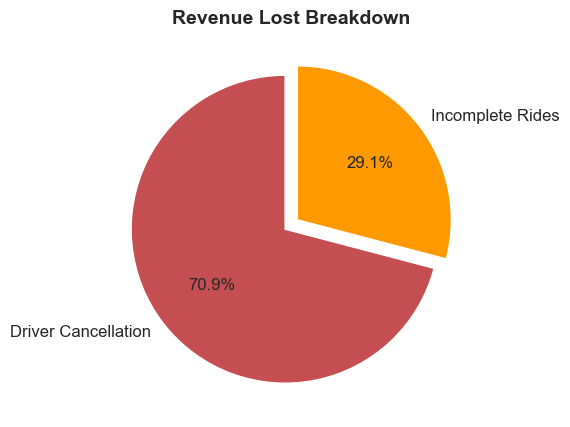

In [445]:
import matplotlib.pyplot as plt

# Prepare data
labels = ['Driver Cancellation', 'Incomplete Rides']
values = [revenue_lost_driver_cancellation, revenue_lost_incomplete_rides]
colors = ['#C44E52', '#FF9900']

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05,0.05))
plt.title('Revenue Lost Breakdown', fontsize=14, fontweight='bold')
plt.show()


In [215]:
# average revenue per ride
num_succesful_rides = len(successful_bookings)
average_revenue_per_ride = revenue_earned / num_succesful_rides

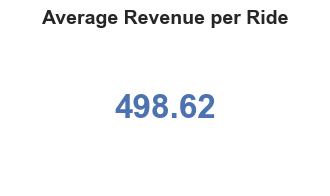

In [455]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, f"{average_revenue_per_ride:,.2f}", fontsize=24, fontweight='bold', ha='center', va='center', color='#4C72B0')
plt.title('Average Revenue per Ride', fontsize=14, fontweight='bold')
plt.axis('off')  # hide axes
plt.show()


# Ride Distribution by Time and Location

In [238]:
time_zone = sample_data.copy()
time_zone['Hour']= pd.to_datetime(time_zone['Time'] , format="%H:%M:%S").dt.hour
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['Late night', 'Early morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Create a new series for time bins without changing original dataframe
time_bins = pd.cut(time_zone['Hour'], bins=bins, labels=labels)

# Count rides per time bin
time_bin_counts = time_bins.value_counts().sort_index()

# Percentage per time bin (for visualization)
time_bin_percentage = (time_bin_counts / time_bin_counts.sum() * 100).round(2)
time_bin_df = pd.DataFrame({
    'Time Bin': time_bin_counts.index,
    'Count': time_bin_counts.values,
    'Percentage': time_bin_percentage.values
})


In [248]:
# top 10 most popular pickup location 
pickup_count = successful_bookings['Pickup Location'].value_counts().head(10).reset_index(name='Count')

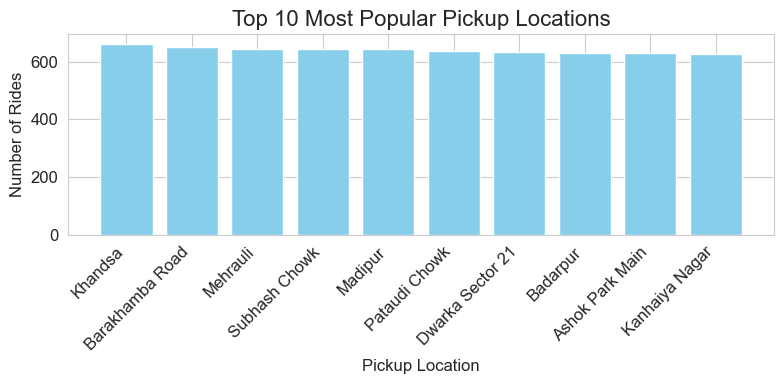

In [485]:
plt.figure(figsize=(8,4))
plt.bar(pickup_count['Pickup Location'], pickup_count['Count'], color='skyblue')

plt.title("Top 10 Most Popular Pickup Locations", fontsize=16)
plt.xlabel("Pickup Location", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\aashu\AppData\Local\Temp\ipykernel_192532\1714133399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


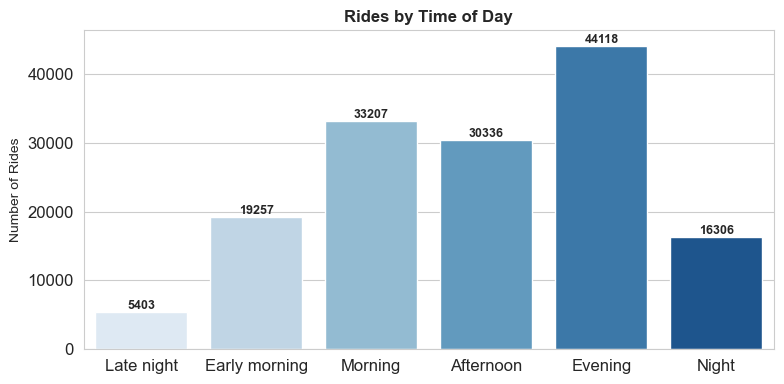

In [467]:
plt.figure(figsize=(8,4))
sns.barplot(
    x='Time Bin', 
    y='Count', 
    data=time_bin_df, 
    palette='Blues'
)
plt.title('Rides by Time of Day', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Rides', fontsize=10)

# Annotate bars
for i, row in time_bin_df.iterrows():
    plt.text(i, row['Count'] + 2, row['Count'], ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Operational CMGR % Growth Anaylysis

In [271]:
# month over month growth rate
successful_bookings['Month'] = successful_bookings['Date'].dt.month
monthly_growth =successful_bookings['Month'].value_counts().sort_index().reset_index()
monthly_growth['Growth_%'] = monthly_growth['count'].pct_change()*100

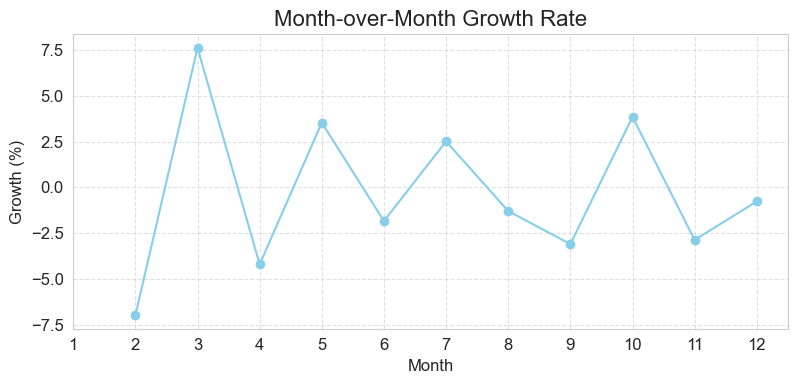

In [489]:
plt.figure(figsize=(8,4))
plt.plot(monthly_growth['Month'], monthly_growth['Growth_%'], marker='o', color='skyblue')

plt.title("Month-over-Month Growth Rate", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Growth (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(monthly_growth['Month'])
plt.tight_layout()
plt.show()


In [287]:
# overall Growth
first_month_value = monthly_growth['count'].iloc[0]
last_month_value = monthly_growth['count'].iloc[-1]
overall_growth = ((last_month_value - first_month_value)/first_month_value)*100

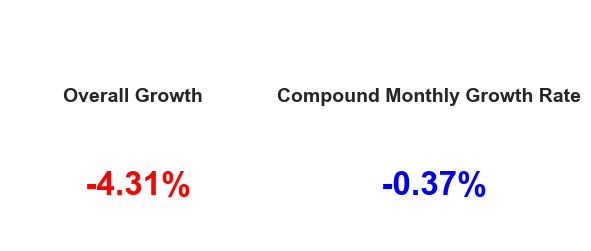

In [511]:
fig, ax = plt.subplots(1,2,figsize=(7,3))


ax[0].axis("off")  # remove axes

# Add KPI text
ax[0].text(0.5, 0.6, "Overall Growth", fontsize=14, fontweight="bold", ha="center")
ax[0].text(0.5, 0.2, f" {  overall_growth:.2f}%", fontsize=24, fontweight="bold", color="red", ha="center")
ax[1].axis("off")
ax[1].text(0.5, 0.6, "Compound Monthly Growth Rate", fontsize=14, fontweight="bold", ha="center")
ax[1].text(0.5, 0.2, f" {  cmgr:.2f}%", fontsize=24, fontweight="bold", color="blue" , ha="center")

plt.show()

In [291]:
# Compoud monthly growth rate(CMGR)
cmgr=  ((last_month_value/first_month_value)**(1/12)-1)*100

In [304]:
# Retention Rate
total_customers = sample_data['Customer ID'].nunique()
returning_customers = sample_data['Customer ID'].value_counts()[sample_data['Customer ID'].value_counts() > 1].count()
retention_rate = (returning_customers / total_customers)*100

(0.0, 1.0, 0.0, 1.0)

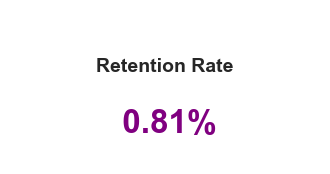

In [515]:
fig, ax = plt.subplots(figsize=(4,2))


ax.axis("off")  # remove axes

# Add KPI text
ax.text(0.5, 0.6, "Retention Rate", fontsize=14, fontweight="bold", ha="center")
ax.text(0.5, 0.2, f" { retention_rate:.2f}%", fontsize=24, fontweight="bold", color="purple", ha="center")
ax.axis("off")

# Customers Experience and Satisfaction

In [311]:
# Average Customer rating
average_customer_rating = sample_data['Customer Rating'].mean()

In [315]:
# average customer rating by vehicle type
average_rating=sample_data.groupby('Vehicle Type' , observed=True)['Customer Rating'].mean().reset_index(name='count')

In [523]:
average_rating

,Vehicle Type,count
0,Auto,4.439357
1,Bike,4.440130
2,Go Mini,4.440442
3,Go Sedan,4.444700
4,Premier Sedan,4.440020
5,Uber XL,4.440481
6,eBike,4.440400


In [321]:
# average drive rating
average_driver_rating = sample_data['Driver Ratings'].mean()

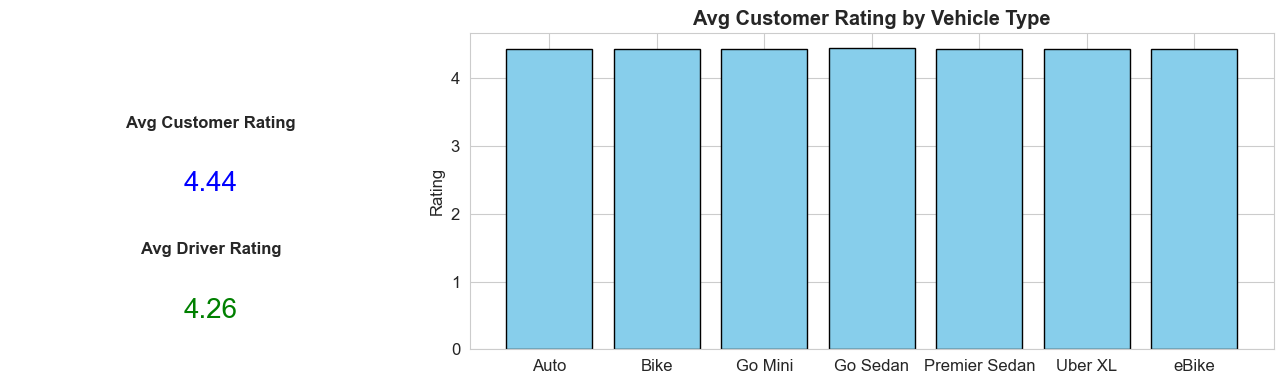

In [529]:
# Layout
fig, axes = plt.subplots(1, 2, figsize=(13,4), gridspec_kw={'width_ratios':[1,2]})

# KPI Cards
axes[0].axis("off")
axes[0].text(0.5, 0.7, "Avg Customer Rating", ha="center", fontsize=12, weight="bold")
axes[0].text(0.5, 0.5, f"{average_customer_rating:.2f}", ha="center", fontsize=20, color="blue")
axes[0].text(0.5, 0.3, "Avg Driver Rating", ha="center", fontsize=12, weight="bold")
axes[0].text(0.5, 0.1, f"{average_driver_rating:.2f}", ha="center", fontsize=20, color="green")

axes[1].bar(average_rating['Vehicle Type'], average_rating['count'], 
            color="skyblue", edgecolor="black")
axes[1].set_title("Avg Customer Rating by Vehicle Type", weight="bold")
axes[1].set_ylabel("Rating")


plt.tight_layout()
plt.show()